# Recommendation Systems - UBCF - Cosine
I used the cosine distance here but I found out that it is not giving proper results. Also, I normalized the rating data as there are huge concentration of ratings above 6. And I only considered ratings above 6 as they would give better reason to recommend that product.

In [2]:
#UBCF
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('book.csv', encoding='iso-8859-1')
data = data.sort_values(by ='User.ID').reset_index(drop = True)
data

,Unnamed: 0,User.ID,Book.Title,Book.Rating
0,2402,8,Wings,5
1,2401,8,The Western way: A practical guide to the West...,5
2,2400,8,Ancient Celtic Romances,5
3,2403,8,Truckers,5
4,2406,8,The Art Of Celtia,7
...,...,...,...,...
9995,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7
9996,2399,278854,Celtic Mythology (Library of the World's Myths...,8
9997,2394,278854,A corrente de Trewis Scott,7
9998,2395,278854,As valkÃ­rias,7


In [4]:
#data = data.iloc[:, 1:]
data.columns = ['index', 'user_id', 'book_title', 'book_rating']

In [5]:
data_dups = data[['user_id', 'book_title']].value_counts().reset_index(name='count')

In [6]:
data_dups

,user_id,book_title,count
0,3757,The Magician's Tale,2
1,278418,White Oleander : A Novel,2
2,162052,Rose,2
3,2276,In the Beauty of the Lilies,2
4,2033,The First Time,2
...,...,...,...
9988,2632,7b,1
9989,2632,"Fair Trial (Harlequin Romance, No 3110)",1
9990,2633,"Unfriendly Proposition (Harlequin Romance, No ...",1
9991,2634,SILVER LININGS : SILVER LININGS,1


In [7]:
data2 = data_dups[data_dups['count'] == 1]

In [8]:
data_new = pd.merge(data, data2)

In [9]:
data_new

,index,user_id,book_title,book_rating,count
0,2402,8,Wings,5,1
1,2401,8,The Western way: A practical guide to the West...,5,1
2,2400,8,Ancient Celtic Romances,5,1
3,2403,8,Truckers,5,1
4,2406,8,The Art Of Celtia,7,1
...,...,...,...,...,...
9981,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),7,1
9982,2399,278854,Celtic Mythology (Library of the World's Myths...,8,1
9983,2394,278854,A corrente de Trewis Scott,7,1
9984,2395,278854,As valkÃ­rias,7,1


In [10]:
data_new = data_new[data_new['book_rating'] > 6]

In [11]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
data_new[['book_rating']] = mm.fit_transform(data_new[['book_rating']])

C:\Users\harivars\AppData\Local\Temp\ipykernel_2728\769894339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new[['book_rating']] = mm.fit_transform(data_new[['book_rating']])


In [12]:
data_new

,index,user_id,book_title,book_rating,count
4,2406,8,The Art Of Celtia,0.000000,1
9,2409,12,Apocalypse Wow,1.000000,1
13,2413,16,Random Acts Of Management:A Dilbert Book,0.666667,1
14,2414,17,Conversations With Dogbert: A Dilbert Book,0.000000,1
18,2418,19,The Murder Book,0.000000,1
...,...,...,...,...,...
9980,2397,278854,Blast From the Past,0.000000,1
9981,2396,278854,La crÃ³nica del PerÃº (CrÃ³nicas de AmÃ©rica),0.000000,1
9982,2399,278854,Celtic Mythology (Library of the World's Myths...,0.333333,1
9983,2394,278854,A corrente de Trewis Scott,0.000000,1


In [13]:
len(data_new.user_id.unique())

1812

In [14]:
len(data_new.book_title.unique())

7390

In [15]:
user_books_df = data_new.pivot(index='user_id',
                                 columns='book_title',
                                 values='book_rating').reset_index(drop=True)

In [16]:
user_books_df

book_title,"Jason, Madison &amp",'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,Zombie!,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1809,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
#Impute those NaNs with 0 values
user_books_df.fillna(0, inplace=True)

In [18]:
user_books_df

book_title,"Jason, Madison &amp",'48,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,01-01-00: A Novel of the Millennium,"1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,"100 Great Fantasy Short, Short Stories",1001 Brilliant Ways to Checkmate,101 Bright Ideas: Esl Activities for All Ages,...,Zombie!,Zoot Suit and Other Plays,Zora Hurston and the Chinaberry Tree (Reading Rainbow Book),\Even Monkeys Fall from Trees\ and Other Japanese Proverbs,\I Won't Learn from You\: And Other Thoughts on Creative Maladjustment,"\More More More,\ Said the Baby",\O\ Is for Outlaw,"\Surely You're Joking, Mr. Feynman!\: Adventures of a Curious Character","\Well, there's your problem\: Cartoons",iI Paradiso Degli Orchi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1807,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Getting the similarities

In [19]:
## Getting the similaritiesfrom sklearn.metrics import pairwise_distances
# from sklearn.metrics.pairwise import cosine_similarity
# from scipy.spatial.distance import cdist

In [20]:
user_sim = 1 - pairwise_distances( (user_books_df).values,metric='cosine')

In [21]:
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [22]:
user_sim_df = pd.DataFrame(user_sim)

In [23]:
user_sim_df.shape

(1812, 1812)

In [24]:
user_sim_df.index = data_new.user_id.unique()
user_sim_df.columns = data_new.user_id.unique()

In [25]:
user_sim_df

,8,12,16,17,19,22,26,32,39,42,...,278831,278832,278836,278843,278844,278846,278849,278851,278852,278854
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278846,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
278849,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
278851,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
278852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
user_sim_df.iloc[10:20, 10:20]

,44,51,53,56,64,67,69,70,78,82
44,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
53,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
64,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
67,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
69,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
70,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
78,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
82,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [27]:
np.fill_diagonal(user_sim, 0)
user_sim_df.iloc[0:5, 0:5]

,8,12,16,17,19
8,0.0,0.0,0.0,0.0,0.0
12,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0
19,0.0,0.0,0.0,0.0,0.0


In [28]:
#Most Similar Users
user_sim_df.idxmax(axis=1)[0:20]

8       8
12      8
16      8
17      8
19      8
22      8
26      8
32      8
39      8
42      8
44      8
51      8
53      8
56      8
64      8
67      8
69      8
70      8
78      8
82    882
dtype: int64

In [29]:
data[(data['user_id']==276726) | (data['user_id']==276729) | (data['user_id']==276737) | (data['user_id']==276744)]

,index,user_id,book_title,book_rating
7601,1,276726,Classical Mythology,5
7602,2,276729,Clara Callan,3
7603,3,276729,Decision in Normandy,6
7605,5,276737,The Mummies of Urumchi,6
7606,6,276744,The Kitchen God's Wife,7


<Axes: >

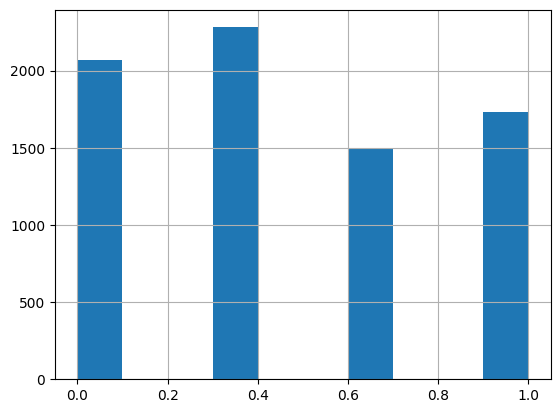

In [30]:
data_new.book_rating.hist()

Inconclusive results as all the similarities are 0.